### Content

#### Dataset
- found on Kaggle
- 25K tweets
- https://www.kaggle.com/mrmorj/hate-speech-and-offensive-language-dataset?select=labeled_data.csv
- pre-labelled: 

> count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

> hate_speech = number of CF users who judged the tweet to be hate speech.

> offensive_language = number of CF users who judged the tweet to be offensive.

> neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

> class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither


#### 1. Pre-Analysis

- Check distributions
- make a new df where labels are binary (e.g. 0 or 1 for false or true)
- Visualisations


#### 2. Cleaning of tweets

- 2.1 Lowering of all words in the Tweets
- 2.2 Removing of duplicates
- 2.3 Removing re-tweets
- 2.4 Removing Twitter handles & special characters
- 2.5 Removing Stopword
- 2.6 Dropping unnecessary columns and saving final dataframe for exploratory data analysis 

*(Handles are used in Twitter to reference someone in a Tweet, for example “Today the sun is shining on Tatooine, let’s grab a milkshake @LukeSkywalker”.)

    *maybe: - (2.5 Lemmatization with part-of-speech (POS)) & - (2.6 Reformatting all spaces and ashtags after lemmatization)

### Collection of interesting findings and arising questions

#### 1. 
- Dataset contains almost 25,000 tweets/datapoints. 
- Where does that data come from? What hashtags/words were used to find this data?

> The creators of this dataset hired a bunch of so-called "crowd-flowers" who labelled the data. This is interesting in itself as it gives a glimpse into the hidden world of ghost workers, i.e. people that perform microtasks for little money and are not directly hired by the company. It's like Uber for AI tasks

> As the first histogram shows, the dataset is very imbalanced. The people (CrowdFlowers) that labelled this data considered most tweets to be offensive only, while these tweets actually contained "hate" words as defined by Hatebase. 
---> we could stratify the data, so it becomes more balanced

> More tweets were considered to be neither hate speech nor offensive language than were considered hate speech.

#### 2.  
- There are ca. 8500 retweets (1/3 of the dataset). I only removed the tweets that start with RT to prevent data loss (ca.6500)

##### Some other ideas (for later)

###### Analyse the tweets
- Test hypotheses:
    - Are longer tweets more likely to contains hate speech?
    - Are tweets with more handles mode agressive?
    
- What is the distribution of retweets that contain hate speech?

### 1. Pre-Analysis

In [1]:
#Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading dataset

twitterdf = pd.read_csv('labeled_data2.csv', delimiter=',',encoding='utf-8', header = 0)

In [3]:
twitterdf

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
twitterdf.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
#printing tweets column only
print (twitterdf['tweet'])

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object


In [6]:
#Showing the whole content of the cell
pd.set_option('display.max_colwidth', None)

In [7]:
twitterdf

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
# Distribution of labels: 

twitterdf.hate_speech.unique()
# 0-7

array([0, 1, 2, 3, 4, 6, 5, 7], dtype=int64)

In [9]:
twitterdf.offensive_language.unique()
# 0-9

array([0, 3, 2, 6, 1, 7, 5, 4, 8, 9], dtype=int64)

In [10]:
twitterdf.neither.unique()
# 0-9

array([3, 0, 1, 2, 6, 4, 5, 9, 8, 7], dtype=int64)

In [11]:
twitterdf.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


<AxesSubplot:>

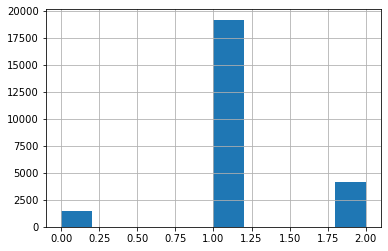

In [12]:
twitterdf['class'].hist()

# > Dataset is very imbalanced. The people (CrowdFlowers) that labelled this data considered most tweets to be offensive only, while these tweets actually contained "hate" words as defined by Hatebase. 
# > More tweets were considered offensive language rather than hate speech or neither

# class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

### 2. Cleaning of tweets

##### 2.1 Lowering of all words in the Tweets


In [13]:
#Make copy
copy = twitterdf.copy()

In [14]:
copy

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [15]:
copy['tweet'] = copy["tweet"].str.lower() 

In [16]:
copy

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


##### 2.2 Removal of duplicates

In [17]:
#Check for number of duplicates
copy.tweet.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Name: tweet, Length: 24783, dtype: bool

In [18]:
copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Length: 24783, dtype: bool

In [19]:
copy.tweet.duplicated().sum()

10

In [20]:
copy.duplicated().sum()
# or: copy.duplicated(subset=['tweet']).sum()

0

-> While the number of 10 can be dismissed, this short comparison shows that in those cases, the tweets were labelled differently - probably because they were labelled by different crowdflowers

In [21]:
# Extract duplicate rows
copy.loc[copy.tweet.duplicated(), :]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
6230,6408,3,1,2,0,1,@jayswaggkillah is a fag
7923,8144,6,0,6,0,1,bad bitches is the only thing that i like
8313,8543,3,0,3,0,1,can i bring another bitch or nah
12987,13306,6,0,6,0,1,my bitch say i'm in the dog house fuck you mean
23599,24092,3,0,3,0,1,bad bitches is the only thing i like
24151,24653,3,0,3,0,1,lil bitch
24311,24815,6,2,4,0,1,okc nigguh
24472,24979,3,0,3,0,1,stupid ass hoe
24473,24980,3,0,3,0,1,stupid bitch
24480,24987,3,0,3,0,1,sup bitches


In [22]:
copy.drop_duplicates(subset='tweet', keep='first', inplace=True, ignore_index=False)

In [23]:
copy

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


##### 2.3 - Removing re-tweets

In [24]:
# check datatypes
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24773 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24773 non-null  int64 
 1   count               24773 non-null  int64 
 2   hate_speech         24773 non-null  int64 
 3   offensive_language  24773 non-null  int64 
 4   neither             24773 non-null  int64 
 5   class               24773 non-null  int64 
 6   tweet               24773 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [25]:
# select tweets that contain RT

contain_values = copy[copy['tweet'].str.contains('rt')]
contain_values

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24721,25234,3,0,0,3,2,wth is that playing missy? ........ i mean seriously? rt @mr_republicann: this movie gone be trash http://t.co/8bippvuvzr
24723,25236,3,0,3,0,1,x_x rt @ladarinaintshit: fat bitches with normal sized legs be looking like car keys.
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho rt @vivala_ari i had no idea she was sleep &#128553;
24757,25270,3,0,3,0,1,you can never get a group of hoes together witout em resorting to being hoes....


In [26]:
pd.set_option('display.max_colwidth', None)

In [27]:
contain_values

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24721,25234,3,0,0,3,2,wth is that playing missy? ........ i mean seriously? rt @mr_republicann: this movie gone be trash http://t.co/8bippvuvzr
24723,25236,3,0,3,0,1,x_x rt @ladarinaintshit: fat bitches with normal sized legs be looking like car keys.
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho rt @vivala_ari i had no idea she was sleep &#128553;
24757,25270,3,0,3,0,1,you can never get a group of hoes together witout em resorting to being hoes....


In [28]:
exclamation = copy[copy['tweet'].str.contains('!!')]

In [29]:
exclamation
#653 tweets contain at least two exclamation marks

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24574,25082,3,1,2,0,1,"this fat bitch was preaching like ""we have too many fat and lazy people!!"" have you seen a mirror wtf"
24592,25103,3,0,3,0,1,thugga let ur bitch suck'em up in rentals!!!
24612,25123,6,0,6,0,1,tricking off ya paper ain't wat u do... gotta learn the game... make dat hoe buy u!!!!
24614,25125,3,0,3,0,1,triple nipple ass hoes!!


In [30]:
# Remove tweets that start with RT

copy[~copy.tweet.str.startswith('rt')]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [31]:
copy
#removed around 6500 retweets

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


#### 2.4 Remove twitter handles

In [32]:
# rename first column
copy.rename(columns={'Unnamed: 0':'id'}, inplace = True)

In [33]:
copy

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like i aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [34]:
import re

In [35]:
# mentions = re.findall("@([a-zA-Z0-9_]{1,50})", copy)
#Tweet = re.sub('@[\w]+','',Tweet)

In [36]:
handles = copy[copy['tweet'].str.contains('@')]

In [37]:
handles
# contains 14225 handles

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho rt @vivala_ari i had no idea she was sleep &#128553;
24737,25250,3,0,1,2,2,yea so about @n_tel 's new friend.. all my friends kno they're only allowed one cute darkie friend n that's me! lol
24756,25269,3,0,3,0,1,you can masturbate anytime bitch lol &#8220;@greyyygoose: i just want some damn alone time. fucccckkkkkk! lol&#8221;
24777,25290,3,2,1,0,0,you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot @dare_ilk


In [38]:
#replaces this stuff &#8221 - which could have all sorts of meanings
import html
copy["tweet"] = copy["tweet"].apply(lambda k: html.unescape(str(k))) 

In [39]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed mentions
    text = re.sub(r'#', '', text) #Removed hashtags
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink
    text = re.sub(r'\'[\s]+', '', text) #Remove apostrophe
    text = re.sub(r'\...+', '', text) #Remove dots
    text = re.sub(r'\!', '', text) #Remove exclamation  marks

    return text

In [45]:
#Cleaning the text
copy['tweet'] = copy['tweet'].apply(clean_text)
copy

,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt : as a woman you shouldn't complain about cleaning up your house
1,1,3,0,3,0,1,rt : boy dats cold
2,2,3,0,3,0,1,rt dawg rt : you ever fuck a bitch and she start to cry? you be confused as shit
3,3,3,0,2,1,1,rt _g_anderson: _based she look like a tranny
4,4,6,0,6,0,1,rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya 
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie “: _pearls _emanuel right his tl is trash …
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
#other way of removing certain characters
#import string
#tweet_test = '... some string with punctuation !! ** , ...'
#tweet_test.translate(str.maketrans('', '', string.punctuation)).strip()

#### 2.5 Remove stopwords

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
#importing stopwords (+rt, rts, retweet) & viewing them
#the nltk library contains about 40 stopwords

from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
stops = set().union(stopwords.words('english'),additional)

In [43]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [49]:
## next steps: remove stopwords and export as csv